# TASK 4 OASIS INFOBYTE DS INTERNSHIP

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("C:/Users/Dubai Laptop/spam.csv", encoding='ISO-8859-1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'] , axis=1)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df=df.rename( columns={"v1":"Labels","v2":"Messages"})

In [9]:
df.head()

,Labels,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
X=df['Messages']
y=df['Labels']

### CONVERTING TARGET VARIABLE INTO NUMERIC

In [11]:
#    Encode the labels (ham = 0, spam = 1)
label_encoder=LabelEncoder()          
df['Labels']=label_encoder.fit_transform(y)

In [12]:
df['Labels'].head(10)

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: Labels, dtype: int32

### CONVERTING INDEPENDENT VARIABLES INTO NUMERIC USING (TF-IDF)

In [13]:
# Use TF-IDF Vectorizer to convert text data to numerical features
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X)

In [14]:
X_tfidf

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [15]:
X_train,X_test,y_train,y_test =train_test_split(X_tfidf , y , test_size=0.2 , random_state=42)

In [16]:
print(X_train.shape, X_test.shape)

(4457, 8404) (1115, 8404)


In [17]:
#TRAINING NAIVE BAYES
model=MultinomialNB()
model.fit(X_train , y_train)

MultinomialNB()

In [18]:
#predicting

y_pred=model.predict(X_test)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

### MODEL EVALUATION

In [19]:
model_performance={
    "predicted labels : " :y_pred

}
acc_data=pd.DataFrame(model_performance)
acc_data

,predicted labels :
0,ham
1,ham
2,ham
3,ham
4,spam
...,...
1110,ham
1111,ham
1112,ham
1113,ham


In [20]:
print("ACCURACY SCORE IS : {:.2f}%".format(accuracy_score(y_pred, y_test) * 100))
print('-'*70)
print("CLASSIFICATION REPORT IS :\n",classification_report(y_pred,y_test))


ACCURACY SCORE IS : 96.86%
----------------------------------------------------------------------
CLASSIFICATION REPORT IS :
               precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1000
        spam       0.77      1.00      0.87       115

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



Text(0, 0.5, ' MESSAGES')

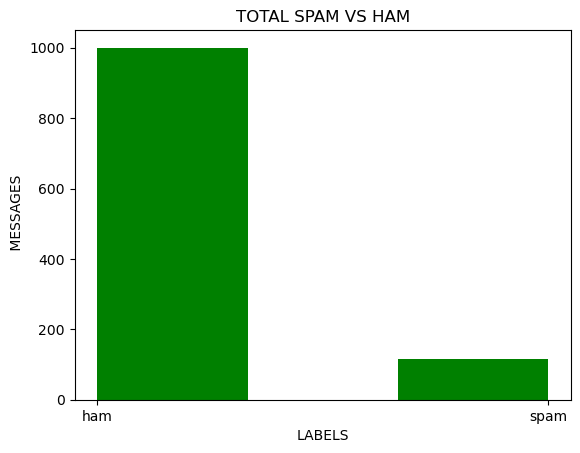

In [21]:
import matplotlib.pyplot as plt

plt.hist(acc_data , bins=3, color="green" )
plt.title("TOTAL SPAM VS HAM")
plt.xlabel("LABELS")
plt.ylabel(" MESSAGES")